In [4]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

import wikipedia
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /home/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/victor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
print(wikipedia.suggest("machine learning"))

machine ;earning


In [22]:
artificial_intelligence = wikipedia.page("Artificial Intelligence").content
machine_learning = wikipedia.page("Machine ;earning").content
deep_learning = wikipedia.page("Deep Learning").content
neural_network = wikipedia.page("Neural Network").content

artificial_intelligence = sent_tokenize(artificial_intelligence)
machine_learning = sent_tokenize(machine_learning)
deep_learning = sent_tokenize(deep_learning)
neural_network = sent_tokenize(neural_network)

artificial_intelligence.extend(machine_learning)
artificial_intelligence.extend(deep_learning)
artificial_intelligence.extend(neural_network)

In [6]:
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [7]:
sent = preprocess_text("Artificial intelligence, is the most advanced technology of the present era")
print(sent)

artificial intelligence advanced technology present


In [23]:
final_corpus = [preprocess_text(sentence) for sentence in artificial_intelligence if sentence.strip() !='']

word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

In [24]:
%%time
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)


CPU times: user 19.9 s, sys: 375 ms, total: 20.2 s
Wall time: 16.8 s


In [25]:
print(ft_model.wv['artificial'])

[-0.21292543 -0.02003183 -0.6185531  -0.08243374 -0.62911445  0.37781966
  0.19347076 -0.29792306 -0.24373683 -0.60599816 -0.3128748  -0.3806463
  0.09394088  0.10997935  0.1737537   0.3962223   0.11113214  0.08191924
  0.29258415  0.40246448 -0.24571173  0.03326169 -0.3582858   0.31939942
  0.11149849  0.11415682 -0.03796491  0.40787914 -0.5074062   0.31634784
  0.03808482 -0.0569208   0.08688272 -0.31975833 -0.1775223  -0.35269654
  0.32818347 -0.18527614  0.17489573 -0.19067447  0.47112197 -0.3917518
  0.25075942  0.34091958  0.12315043  0.32276216 -0.19122681  0.2859786
  0.2771292  -0.30819413 -0.3278147   0.28399968 -0.01993975  0.06718253
 -0.22286448  0.04904397  0.1583139   0.17141128 -0.11528602 -0.28742823]


In [26]:
ft_model.wv.most_similar('artificial', topn=5)

[('intelligence', 0.764254093170166),
 ('simulated', 0.5417742729187012),
 ('moral', 0.5214012861251831),
 ('machine', 0.5074187517166138),
 ('reference', 0.4972919821739197)]

In [16]:
ft_model.wv.most_similar('deep', topn=5)

[('learning', 0.8452771902084351),
 ('scale', 0.6421436071395874),
 ('specifically', 0.6302429437637329),
 ('generative', 0.6217418909072876),
 ('convolutional', 0.602696418762207)]

In [28]:
ft_model.wv.most_similar('learning', topn=5)

[('deep', 0.861295759677887),
 ('method', 0.6053075194358826),
 ('specifically', 0.5666370391845703),
 ('vision', 0.5206397771835327),
 ('convolutional', 0.5182703733444214)]

In [14]:
ft_model.wv.most_similar('victor', topn=5)

[('factor', 0.8074829578399658),
 ('vector', 0.8046977519989014),
 ('popular', 0.5985499620437622),
 ('patient', 0.5720779895782471),
 ('position', 0.5402559041976929)]

In [29]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=10)]
                  for words in ['artificial', 'intelligence', 'machine', 'network', 'recurrent', 'deep']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

artificial:['intelligence', 'simulated', 'moral', 'machine', 'reference', 'self', 'creating', 'simulate', 'cybernetics', 'turing']
intelligence:['artificial', 'simulated', 'intelligent', 'creating', 'human', 'general', 'machine', 'simulate', 'simulation', 'effect']
machine:['ethical', 'ethic', 'moral', 'ability', 'argument', 'artificial', 'intelligence', 'translation', 'argued', 'concerned']
network:['neural', 'recurrent', 'convolutional', 'biological', 'specifically', 'unit', 'activation', 'universal', 'backpropagation', 'approximation']
recurrent:['convolutional', 'supervised', 'network', 'unsupervised', 'neural', 'depth', 'drug', 'vision', 'inspired', 'feedforward']
deep:['learning', 'speech', 'scale', 'specifically', 'convolutional', 'generative', 'lstm', 'cnns', 'recognition', 'depth']


In [30]:
from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['artificial', 'intelligence', 'simulated', 'moral', 'machine', 'reference', 'self', 'creating', 'simulate', 'cybernetics', 'turing', 'intelligence', 'artificial', 'simulated', 'intelligent', 'creating', 'human', 'general', 'machine', 'simulate', 'simulation', 'effect', 'machine', 'ethical', 'ethic', 'moral', 'ability', 'argument', 'artificial', 'intelligence', 'translation', 'argued', 'concerned', 'network', 'neural', 'recurrent', 'convolutional', 'biological', 'specifically', 'unit', 'activation', 'universal', 'backpropagation', 'approximation', 'recurrent', 'convolutional', 'supervised', 'network', 'unsupervised', 'neural', 'depth', 'drug', 'vision', 'inspired', 'feedforward', 'deep', 'learning', 'speech', 'scale', 'specifically', 'convolutional', 'generative', 'lstm', 'cnns', 'recognition', 'depth']
<class 'list'>
66


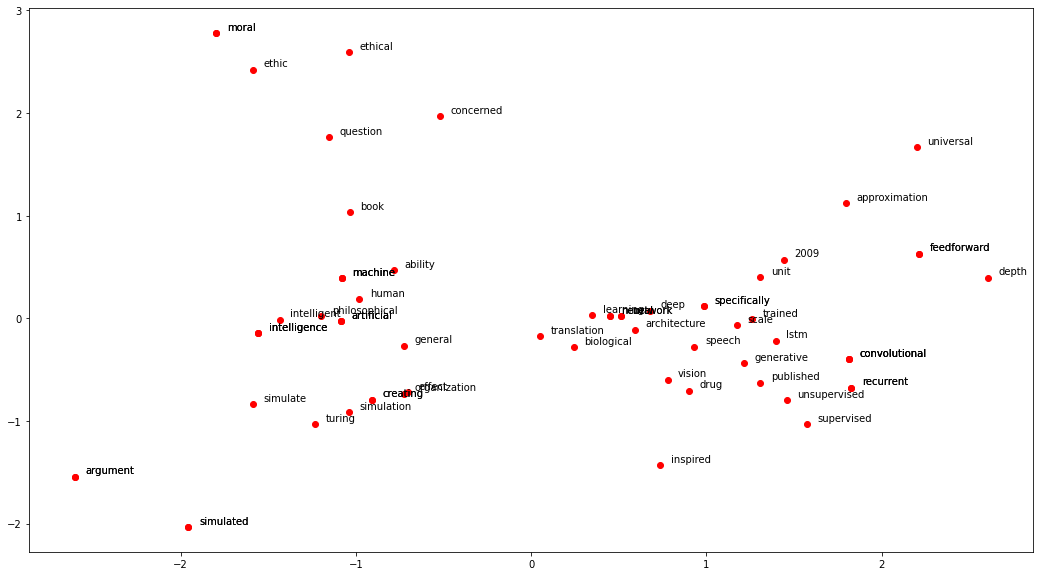

In [17]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')
    